In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tf_utils

In [29]:
tf.compat.v1.disable_eager_execution()
y_hat = tf.constant(36, name="y_hat")
y = tf.constant(39, name="y")

loss = tf.Variable((y - y_hat)**2, name="loss")

init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as session:
    session.run(init)
    print(session.run(loss))

9


In [3]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a, b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [4]:
session = tf.compat.v1.Session ()
print(session.run(c))

20


In [5]:
x = tf.compat.v1.placeholder(tf.int64, name="x")
print(session.run(2*x, feed_dict={x: 3}))
session.close()

6


In [6]:
def linear_function():
    np.random.seed(1)

    X = tf.constant(np.random.randn(3, 1), name="X")
    W = tf.constant(np.random.randn(4, 3), name="W")
    b = tf.constant(np.random.randn(4, 1), name="b")
    Y = tf.add(tf.matmul(W, X), b)
    
    tf.compat.v1.disable_eager_execution()
    session = tf.compat.v1.Session()
    result = session.run(Y)

    session.close()

    return result

In [7]:
print(f"result = {str(linear_function())}")

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [8]:
def sigmoid(z):
    x = tf.compat.v1.placeholder(tf.float32, name="x")

    sigmoid = tf.sigmoid(x)

    tf.compat.v1.disable_eager_execution()
    session = tf.compat.v1.Session()
    result = session.run(sigmoid, feed_dict={x:z})

    return result    

In [9]:
print(f"sigmoid(0) = {str(sigmoid(0))}")
print(f"sigmoid(12) = {str(sigmoid(12))}")

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


In [10]:
def cost(logits, labels):
    z = tf.compat.v1.placeholder(tf.float32, name="logits")
    y = tf.compat.v1.placeholder(tf.float32, name="labels")

    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)

    tf.compat.v1.disable_eager_execution()
    session = tf.compat.v1.Session()

    cost = session.run(cost, feed_dict={z:logits, y:labels})

    session.close()

    return cost

In [11]:
logits = sigmoid(np.array([0.2, 0.4, 0.7, 0.9]))
cost = cost(logits, np.array([0, 0, 1, 1]))
print(f"cost = {str(cost)}")

cost = [1.0053872  1.0366408  0.41385433 0.39956617]


In [12]:
def one_hot_matrix(labels, C):
    C = tf.constant(C, name="C")

    one_hot_matrix = tf.one_hot(labels, C, axis=0)

    tf.compat.v1.disable_eager_execution()
    session = tf.compat.v1.Session()

    one_hot = session.run(one_hot_matrix)

    session.close()

    return one_hot

In [13]:
labels = np.array([1, 2, 3, 0, 2, 1])
one_hot = one_hot_matrix(labels, C=4)
print(f"one_hot = {str(one_hot)}")

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [14]:
def ones(shape):
    ones = tf.ones(shape)

    tf.compat.v1.disable_eager_execution()
    session = tf.compat.v1.Session()

    ones = session.run(ones)

    session.close()

    return ones

In [15]:
print(f"ones = {str(ones([3]))}")

ones = [1. 1. 1.]


In [16]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = tf_utils.load_dataset()

y = 5


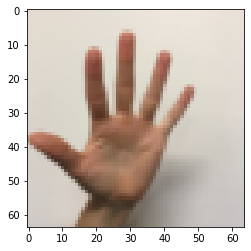

In [17]:
index = 3
plt.imshow(X_train_orig[index])
print(f"y = {str(np.squeeze(Y_train_orig[:, index]))}")

In [18]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.

Y_train = tf_utils.convert_to_one_hot(Y_train_orig, 6)
Y_test = tf_utils.convert_to_one_hot(Y_test_orig, 6)

print(f"number of training examples = {str(X_train.shape[1])}")
print(f"number of test examples = {str(X_test.shape[1])}")
print(f"X_train shape: {str(X_train.shape)}")
print(f"Y_train shape: {str(Y_train.shape)}")
print(f"X_test shape: {str(X_test.shape)}")
print(f"Y_test shape: {str(Y_test.shape)}")

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [19]:
def create_placeholders(n_x, n_y):
    X = tf.compat.v1.placeholder(tf.float32, shape=(n_x,None), name="X")
    Y = tf.compat.v1.placeholder(tf.float32, shape=(n_y,None), name="Y")

    return X, Y

In [20]:
X, Y = create_placeholders(12288, 6)
print(f"X = {str(X)}")
print(f"Y = {str(Y)}")

X = Tensor("X_5:0", shape=(12288, None), dtype=float32)
Y = Tensor("Y_1:0", shape=(6, None), dtype=float32)


In [21]:
def initialize_parameters():
    tf.random.set_seed(1)

    W1 = tf.compat.v1.get_variable("W1", [25, 12288], initializer=tf.initializers.GlorotUniform(seed=1))
    b1 = tf.compat.v1.get_variable("b1", [25, 1], initializer=tf.zeros_initializer())
    W2 = tf.compat.v1.get_variable("W2", [12,25], initializer=tf.initializers.GlorotUniform(seed=1))
    b2 = tf.compat.v1.get_variable("b2", [12,1], initializer=tf.zeros_initializer())
    W3 = tf.compat.v1.get_variable("W3", [6,12], initializer=tf.initializers.GlorotUniform(seed=1))
    b3 = tf.compat.v1.get_variable("b3", [6,1], initializer=tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [22]:
tf.compat.v1.reset_default_graph()
tf.compat.v1.disable_eager_execution()
session = tf.compat.v1.Session()
parameters = initialize_parameters()
print("W1 = " + str(parameters['W1']))
print("b1 = " + str(parameters['b1']))
print("W2 = " + str(parameters['W2']))
print("b2 = " + str(parameters['b2']))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32>


In [23]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    Z1 = tf.matmul(W1, X) + b1
    A1 = tf.nn.relu(Z1)
    Z2 = tf.matmul(W2, A1) + b2
    A2 = tf.nn.relu(Z2)
    Z3 = tf.matmul(W3, A2) + b3

    return Z3

In [24]:
tf.compat.v1.reset_default_graph()
tf.compat.v1.disable_eager_execution()
session = tf.compat.v1.Session()
X, Y = create_placeholders(12288, 6)
parameters = initialize_parameters()
Z3 = forward_propagation(X, parameters)
print(f"Z3 = {Z3}")

Z3 = Tensor("add_2:0", shape=(6, None), dtype=float32)


In [25]:
def compute_cost(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))

    return cost

In [26]:
tf.compat.v1.reset_default_graph()
tf.compat.v1.disable_eager_execution()
session = tf.compat.v1.Session()
X, Y = create_placeholders(12288, 6)
parameters = initialize_parameters()
Z3 = forward_propagation(X, parameters)
cost = compute_cost(Z3, Y)
print(f"cost = {str(cost)}")

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [27]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.0001,
        num_epochs=1500, minibatch_size=32, print_cost=True):
    

    tf.compat.v1.reset_default_graph()
    tf.random.set_seed(1)
    seed = 3
    (n_x, m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []

    X, Y = create_placeholders(n_x, n_y)

    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(cost)
    init = tf.compat.v1.global_variables_initializer()
    with tf.compat.v1.Session () as session:
        session.run(init)
        for epoch in range(num_epochs):
            epoch_cost = 0.
            num_minibatches = int(m / minibatch_size)
            seed += 1
            minibatches = tf_utils.random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , minibatch_cost = session.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                epoch_cost += minibatch_cost / num_minibatches

                if epoch % 5 == 0:
                    costs.append(epoch_cost)
                    if print_cost == True and epoch % 100 == 0:
                        print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
                    
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title(f"Learning rate ={str(learning_rate)}")
        plt.show()

        parameters = session.run(parameters)
        print ("Parameters have been trained!")

        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))

        return parameters                

Cost after epoch 0: 0.053738
Cost after epoch 0: 0.107454
Cost after epoch 0: 0.161887
Cost after epoch 0: 0.221963
Cost after epoch 0: 0.279912
Cost after epoch 0: 0.332872
Cost after epoch 0: 0.387287
Cost after epoch 0: 0.442010
Cost after epoch 0: 0.497504
Cost after epoch 0: 0.552424
Cost after epoch 0: 0.606178
Cost after epoch 0: 0.660954
Cost after epoch 0: 0.718143
Cost after epoch 0: 0.774172
Cost after epoch 0: 0.830786
Cost after epoch 0: 0.884943
Cost after epoch 0: 0.939548
Cost after epoch 0: 0.994305
Cost after epoch 0: 1.048592
Cost after epoch 0: 1.104795
Cost after epoch 0: 1.159782
Cost after epoch 0: 1.214736
Cost after epoch 0: 1.268960
Cost after epoch 0: 1.324578
Cost after epoch 0: 1.377056
Cost after epoch 0: 1.431603
Cost after epoch 0: 1.487895
Cost after epoch 0: 1.543973
Cost after epoch 0: 1.598473
Cost after epoch 0: 1.652534
Cost after epoch 0: 1.705833
Cost after epoch 0: 1.759143
Cost after epoch 0: 1.812944
Cost after epoch 0: 1.866523
Cost after epo

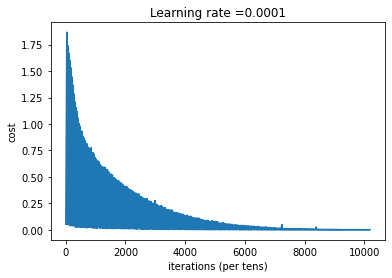

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.85833335


In [28]:
parameters = model(X_train, Y_train, X_test, Y_test)